**India vs Australia**

In [ ]:
#Project Start

import numpy as np 
import pandas as pd 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_json('/content/drive/MyDrive/ODI.json')


In [ ]:
df

,0,50,100,,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,Unnamed: 13
0,20,96,49,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,
1,15,93,25,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,
2,20,82,30,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,
3,34,68,28,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,
4,28,77,19,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-,-,-,45,ZS Ansari (ENG),2015-2015,1,-,-,-,-,-,-,-,
2496,-,-,-,46,Ariful Haque (BDESH),2018-2018,1,-,-,-,-,-,-,-,
2497,-,-,-,47,Ashfaq Ahmed (PAK),1994-1994,3,-,-,-,-,-,-,-,
2498,-,-,-,48,MD Bailey (NZ),1998-1998,1,-,-,-,-,-,-,-,


In [ ]:
df.to_csv (r'/content/sample_data/ODI.csv', index = None)

In [ ]:
! python -m pip install pymongo==3.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.6/628.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymongo: filename=pymongo-3.7.2-cp39-cp39-linux_x86_64.whl size=427392 sha256=2b6c8f136df3e3ba24d286f6b7fecb751994451c5498385aa7e693739d920eb0
  Stored in directory: /root/.cache/pip/wheels/f5/09/ef/63aed9051effc647dde06bf22a2ff0c8537a0bdae2dde72121
Successfully built pymongo


In [ ]:
import datetime
import pymongo
from pymongo import MongoClient

# uri (uniform resource identifier) defines the connection parameters 
uri = '/content/sample_data/ODI.csv'
# start client to connect to MongoDB server 
client = MongoClient( uri )

In [ ]:
client.stats 

Database(MongoClient(host=['/content/sample_data/odi.csv:27017'], document_class=dict, tz_aware=False, connect=True), 'stats')

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/ODIMatchResults_Inn.csv')

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team1   7602 non-null   object 
 1   runs    7602 non-null   int64  
 2   Inn     7602 non-null   int64  
 3   overs   7602 non-null   float64
 4   rpo     7602 non-null   float64
 5   Date    7602 non-null   object 
 6   result  7602 non-null   object 
 7   team2   7602 non-null   object 
 8   Ground  7602 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 534.6+ KB


In [ ]:
df_1.values

array([['Australia', 240, 1, ..., 'lost', 'West Indies', 'Melbourne'],
       ['West Indies', 241, 2, ..., 'won', 'Australia', 'Melbourne'],
       ['Sri Lanka', 239, 1, ..., 'lost', 'Australia', 'Sydney'],
       ...,
       ['South Africa', 258, 2, ..., 'won', 'Australia', 'Potchefstroom'],
       ['Australia', 258, 1, ..., 'won', 'New Zealand', 'Sydney'],
       ['New Zealand', 187, 2, ..., 'lost', 'Australia', 'Sydney']],
      dtype=object)

In [ ]:
df_1.shape

(7602, 9)

In [ ]:
df_1.describe()

,runs,Inn,overs,rpo
count,7602.000000,7602.000000,7602.000000,7602.000000
mean,219.877927,1.500000,44.785057,4.905963
std,60.789866,0.500033,7.718425,1.096836
min,35.000000,1.000000,4.200000,1.680000
25%,179.000000,1.000000,42.400000,4.160000
50%,221.000000,1.500000,48.300000,4.850000
75%,259.000000,2.000000,50.000000,5.560000
max,481.000000,2.000000,55.000000,15.830000


<Axes: >

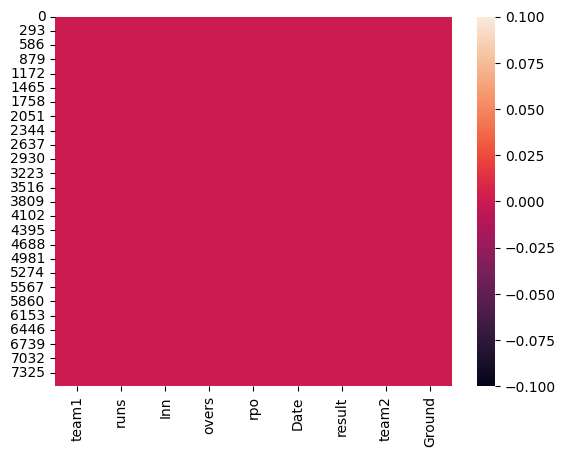

In [ ]:
sns.heatmap(df_1.isnull())

In [ ]:
df_1['Year'] = df_1['Date'].apply(lambda date : date.split(" ")[2])
df_1['Month']  = df_1['Date'].apply(lambda date : date.split(" ")[1])
df_1.drop('Date',axis=1,inplace=True)

In [ ]:
df_1.head()

,team1,runs,Inn,overs,rpo,result,team2,Ground,Year,Month
0,Australia,240,1,50.0,4.80,lost,West Indies,Melbourne,1985,Jan
1,West Indies,241,2,44.5,5.37,won,Australia,Melbourne,1985,Jan
2,Sri Lanka,239,1,49.0,4.87,lost,Australia,Sydney,1985,Jan
3,Australia,240,2,46.2,5.17,won,Sri Lanka,Sydney,1985,Jan
4,Sri Lanka,197,1,50.0,3.94,lost,West Indies,Hobart,1985,Jan


In [ ]:
df_1 = df_1[((df_1['team1'] == 'Australia')&(df_1['team2']== 'India'))|((df_1['team2'] == 'Australia')&(df_1['team1']== 'India'))]
df_1

,team1,runs,Inn,overs,rpo,result,team2,Ground,Year,Month
62,Australia,163,1,49.3,3.29,lost,India,Melbourne,1985,Mar
63,India,165,2,36.1,4.56,won,Australia,Melbourne,1985,Mar
82,Australia,139,1,42.3,3.27,lost,India,Sharjah,1985,Mar
83,India,140,2,39.2,3.55,won,Australia,Sharjah,1985,Mar
126,India,161,1,43.0,3.74,lost,Australia,Brisbane,1986,Jan
...,...,...,...,...,...,...,...,...,...,...
7555,Australia,258,2,37.4,6.84,won,India,Mumbai,2020,Jan
7556,India,340,1,50.0,6.80,won,Australia,Rajkot,2020,Jan
7557,Australia,304,2,49.1,6.18,lost,India,Rajkot,2020,Jan
7558,Australia,286,1,50.0,5.72,lost,India,Bengaluru,2020,Jan


In [ ]:
ind_aus = df_1[((df_1['team1'] == 'Australia')&(df_1['team2']== 'India'))|((df_1['team2'] == 'Australia')&(df_1['team1']== 'India'))]
ind_aus

,team1,runs,Inn,overs,rpo,result,team2,Ground,Year,Month
62,Australia,163,1,49.3,3.29,lost,India,Melbourne,1985,Mar
63,India,165,2,36.1,4.56,won,Australia,Melbourne,1985,Mar
82,Australia,139,1,42.3,3.27,lost,India,Sharjah,1985,Mar
83,India,140,2,39.2,3.55,won,Australia,Sharjah,1985,Mar
126,India,161,1,43.0,3.74,lost,Australia,Brisbane,1986,Jan
...,...,...,...,...,...,...,...,...,...,...
7555,Australia,258,2,37.4,6.84,won,India,Mumbai,2020,Jan
7556,India,340,1,50.0,6.80,won,Australia,Rajkot,2020,Jan
7557,Australia,304,2,49.1,6.18,lost,India,Rajkot,2020,Jan
7558,Australia,286,1,50.0,5.72,lost,India,Bengaluru,2020,Jan


In [ ]:
ind_df = ind_aus[ind_aus['team1']=='India']
aus_df = ind_aus[ind_aus['team1']=='Australia']

In [ ]:
ind_aus_inn1 = ind_aus[ind_aus['Inn']==1]
ind_aus_chase = ind_aus[ind_aus['Inn']==2]

In [ ]:
ind_df_1st = ind_df[ind_df['Inn']==1]
ind_df_2nd = ind_df[ind_df['Inn']==2]
aus_df_1st = aus_df[aus_df['Inn']==1]
aus_df_2nd = aus_df[aus_df['Inn']==2]

In [ ]:
#Data Visualizations
px.histogram(ind_df_1st['runs'],labels = {'value' : 'India : Runs scored batting 1st'},nbins=30) 


In [ ]:
px.histogram(aus_df_1st['runs'],labels = {'value' : 'Australia : Runs scored batting 1st'},nbins=30,color_discrete_sequence=['indianred']) 

In [ ]:
px.histogram(ind_df_2nd['runs'],labels = {'value' :'Inda : Runs scored batting 2nd'},nbins=30, )

In [ ]:
px.histogram(aus_df_2nd['runs'],labels = {'value' :'Australia : Runs scored batting 2nd'},nbins=30, color_discrete_sequence=['indianred'])

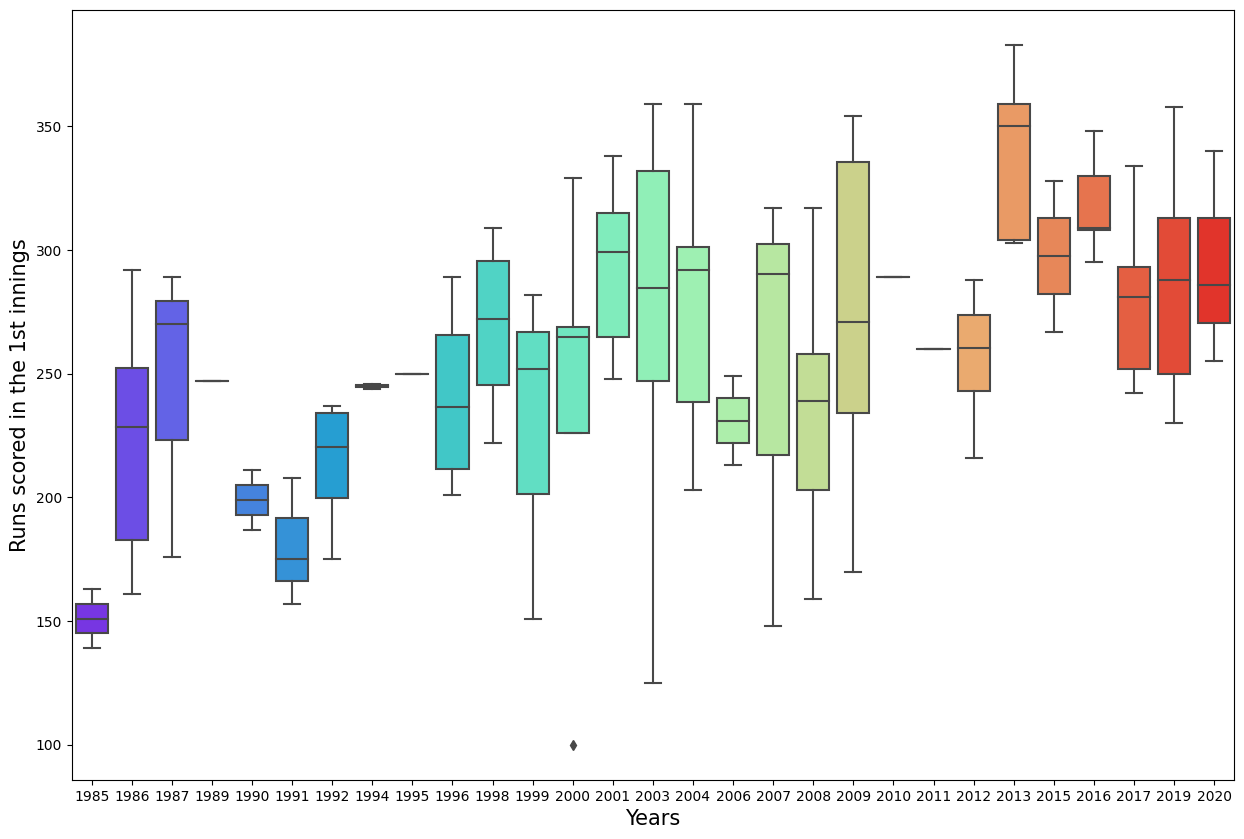

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'Year',y = 'runs',data=ind_aus_inn1,palette = 'rainbow');
ax.set_xlabel('Years',fontsize = 15)
ax.set_ylabel('Runs scored in the 1st innings',fontsize=15);

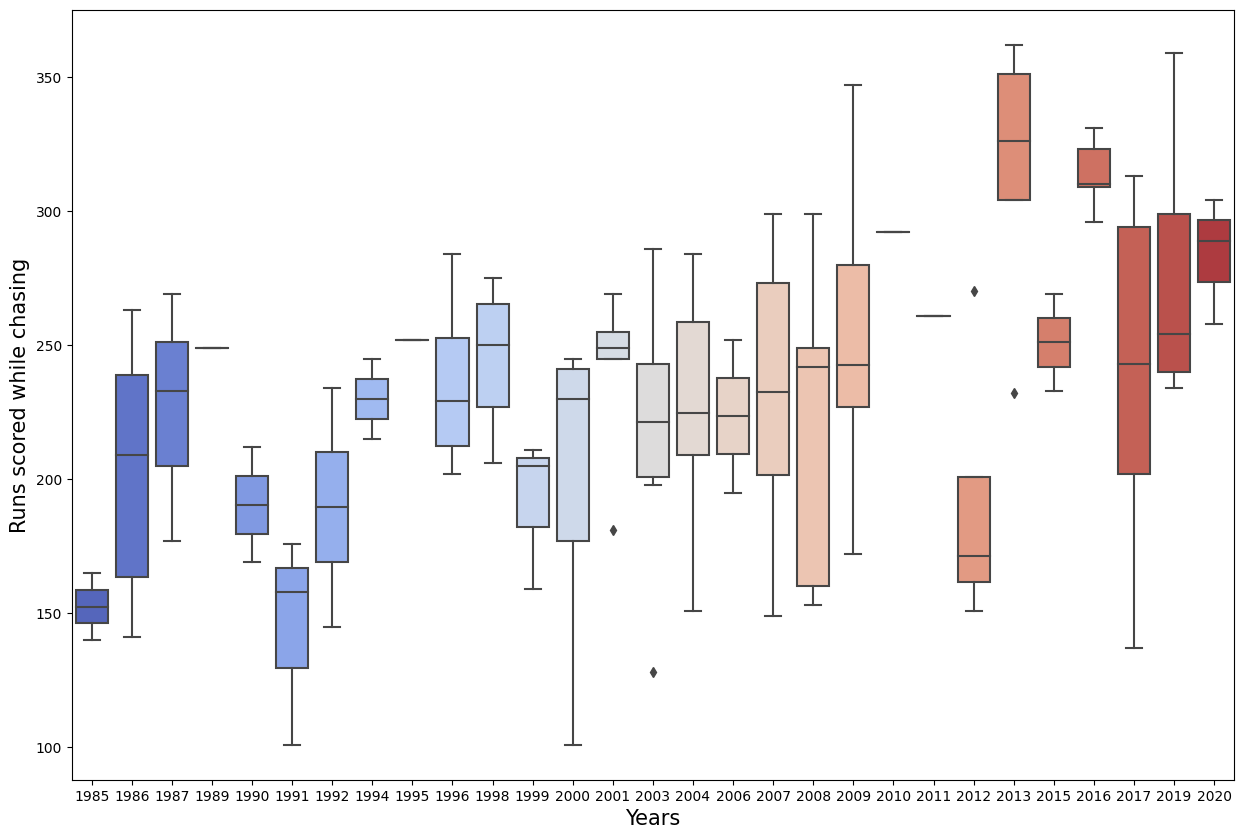

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'Year',y = 'runs',data=ind_aus_chase,palette = 'coolwarm');
ax.set_xlabel('Years',fontsize = 15)
ax.set_ylabel('Runs scored while chasing',fontsize=15);

These results which we received clearly shows that the scoring capablity of the teams in ODI cricket has increased with time. Mean batting scores in 1985 used to be 150 which rose to around 300 till 2020.

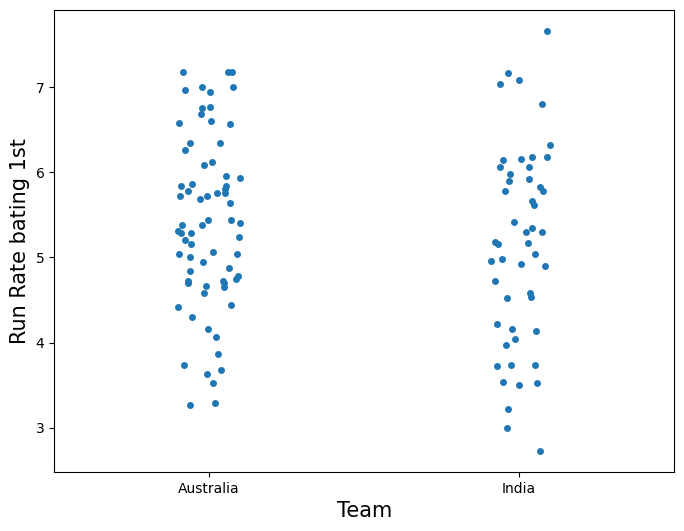

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'team1',y = 'rpo',data = ind_aus_inn1);
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Run Rate bating 1st',fontsize = 15) ;

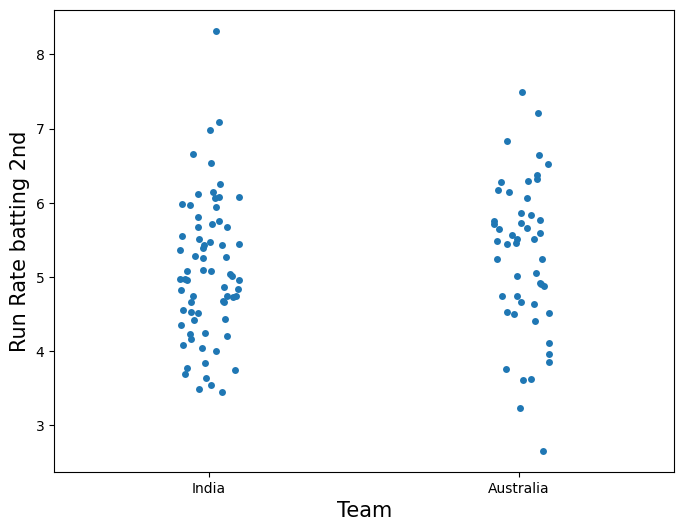

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x = 'team1',y = 'rpo',data = ind_aus_chase);
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Run Rate batting 2nd',fontsize = 15) ;

While Australia has been more consistent in setting the target at high runrate and finally setting enormous targets (300+ in 14 matches), as illustrated in previous plots, India has been more consistent in pursuing scores at higher runrate (5 - 7 and 7+ on quite many games).

In [ ]:
#First batting India
fig = px.pie(ind_df_1st,values = 'Inn',names = 'result')
fig.show()

In [ ]:
ind_df_2nd['Inn'] = ind_df_2nd['Inn']/2 

<ipython-input-61-b6f7a0daab37>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#When India bats second
fig = px.pie(ind_df_2nd,values = 'Inn',names = 'result')
fig.show()

In [ ]:
#2020 analysis
ind_aus['Year'] = ind_aus['Year'].astype('int')
last_5_year = ind_aus[ind_aus['Year']>=2015]

In [ ]:
match_1_2 = last_5_year[last_5_year['Ground']=='Sydney']
match_1_2

,team1,runs,Inn,overs,rpo,result,team2,Ground,Year,Month
6438,Australia,328,1,50.0,6.56,won,India,Sydney,2015,Mar
6439,India,233,2,46.5,4.97,lost,Australia,Sydney,2015,Mar
6596,Australia,330,1,50.0,6.60,lost,India,Sydney,2016,Jan
6597,India,331,2,49.4,6.66,won,Australia,Sydney,2016,Jan
7258,Australia,288,1,50.0,5.76,won,India,Sydney,2019,Jan
7259,India,254,2,50.0,5.08,lost,Australia,Sydney,2019,Jan


In [ ]:
match_1_2[(match_1_2['result']=='won')&(match_1_2['Inn']==1)]['runs'].mean()

308.0

In [ ]:
match_1_2[(match_1_2['result']=='won')&(match_1_2['Inn']==2)]['runs'].mean()

331.0

In [ ]:
match_3 = last_5_year[last_5_year['Ground']=='Canberra']
match_3

,team1,runs,Inn,overs,rpo,result,team2,Ground,Year,Month
6594,Australia,348,1,50.0,6.96,won,India,Canberra,2016,Jan
6595,India,323,2,49.2,6.54,lost,Australia,Canberra,2016,Jan


**Australia has beaten India 3/4 times on both sites. The four games have all had heavy scoring. In order to win on site 1, the side batting first needs to set a lofty goal close to 340; otherwise, it will be a tough battle! The same is true of venue 2.**